In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'

In [2]:
nowcast_tracer_path = "/results/SalishSea/nowcast-green/18apr16/SalishSea_1h_20160418_20160418_ptrc_T.nc"
rerun_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr18_full_run_old_forcing_2/SalishSea_1h_20160418_20160418_ptrc_T.nc"

n_grid_t = xr.open_dataset(nowcast_tracer_path)
r_grid_t = xr.open_dataset(rerun_tracer_path)

In [ ]:
n_grid_t

In [5]:
def plot_time_dif(var_name, array_1, array_2):

    dif_array = (array_1[var_name] - array_2[var_name])

    max_index = np.unravel_index(dif_array.values.argmax(), dif_array.values.shape)

    x_slice = max_index[3]
    y_slice = max_index[2]
    deptht = max_index[1]
    time_counter = slice(0,24)

    fig, ax = plt.subplots(1,2, figsize = (15,8))

    (dif_array.isel(deptht = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[0])
    (array_1[var_name].isel(deptht = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[1])

    
def plot_space_dif(var_name, array_1, array_2, grid_width = 10):

    dif_array = (array_1[var_name] - array_2[var_name])

    max_index = np.unravel_index(dif_array.values.argmax(), dif_array.values.shape)

    print(array_1[var_name].isel(x = max_index[3], y = max_index[2], deptht = max_index[1], time_counter = max_index[0]))
    
    x_slice = slice(max(0,max_index[3] - int(grid_width/2)),min(array_1.coords.dims['x'], max_index[3] + int(grid_width/2))) #max_index[3] + 0 
    y_slice = slice(max(0,max_index[2] - int(grid_width/2)), min(array_1.coords.dims['y'],max_index[2] + int(grid_width/2))) # max_index[2] + 0
    deptht = max_index[1]
    time_counter = max_index[0] 
    
    fig, ax = plt.subplots(1,2, figsize = (15,8))

    (dif_array.isel(deptht = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[0])
    (array_1[var_name].isel(deptht = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[1])

In [ ]:
n_grid_t.PHY.isel(x=1,y=1,time_counter =1, deptht =1)

<xarray.DataArray 'NO3' ()>
array(4.286578178405762)
Coordinates:
    deptht         float32 2.50001
    nav_lat        float32 49.122
    nav_lon        float32 -123.192
    time_centered  datetime64[ns] 2016-04-18T22:30:00
    time_counter   datetime64[ns] 2016-04-18T22:30:00
    x              int64 311
    y              int64 423
Attributes:
    long_name: Nitrate Concentration
    units: mmol/m3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area


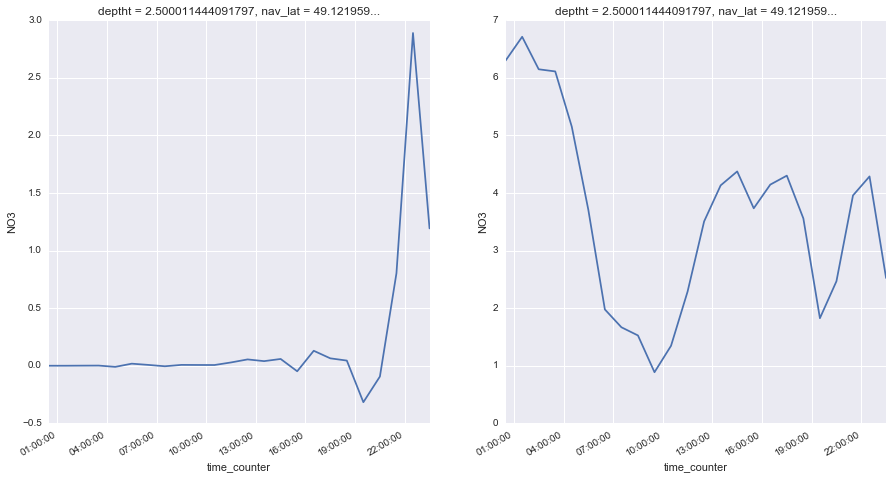

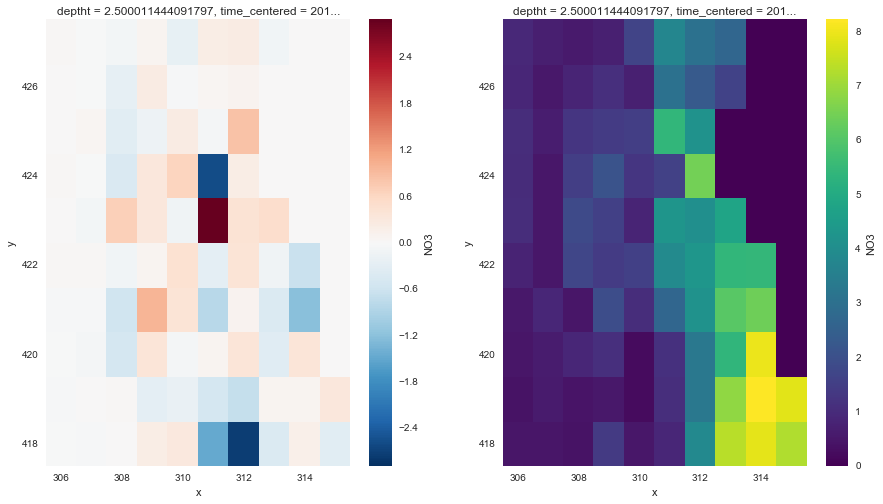

In [6]:
plot_time_dif("NO3", n_grid_t, r_grid_t)
plot_space_dif("NO3", n_grid_t, r_grid_t)

<xarray.DataArray 'DOC' ()>
array(7.327282428741455)
Coordinates:
    deptht         float32 2.50001
    nav_lat        float32 48.1433
    nav_lon        float32 -123.571
    time_centered  datetime64[ns] 2016-04-18T20:30:00
    time_counter   datetime64[ns] 2016-04-18T20:30:00
    x              int64 134
    y              int64 261
Attributes:
    long_name: Dissolved organic Concentration
    units: mmol/m3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area


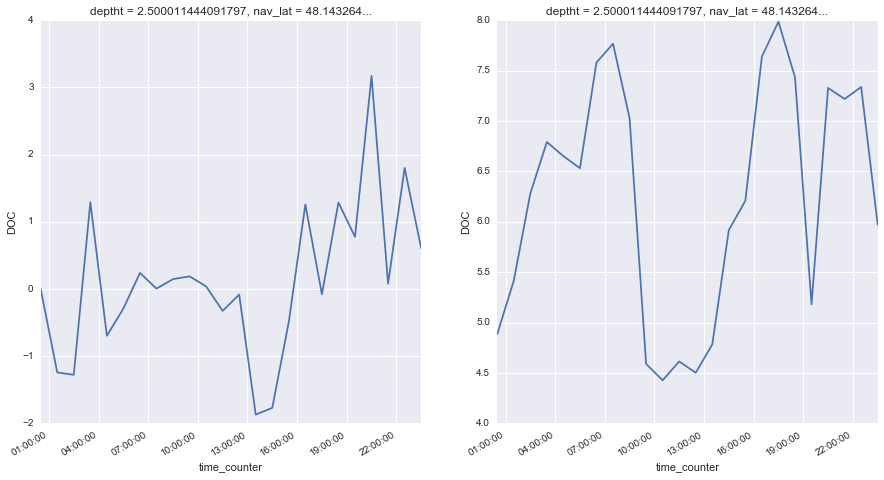

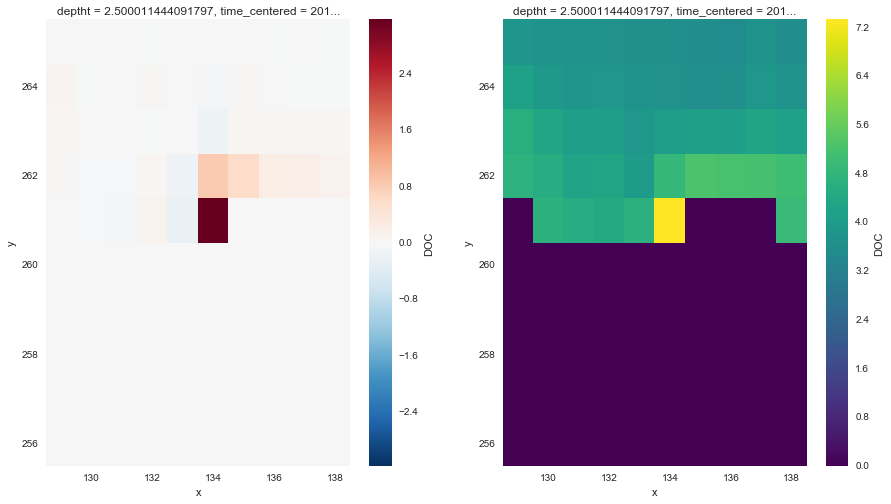

In [7]:
plot_time_dif("DOC", n_grid_t, r_grid_t)
plot_space_dif("DOC", n_grid_t, r_grid_t)

In [8]:
plot_time_dif("PHY2", n_grid_t, r_grid_t)
plot_space_dif("PHY2", n_grid_t, r_grid_t)

MemoryError: 

In [ ]:
plot_time_dif("O2", n_grid_t, r_grid_t)
plot_space_dif("O2", n_grid_t, r_grid_t)

In [ ]:
nowcast_v_path = "/results/SalishSea/nowcast-green/18apr16/SalishSea_1h_20160418_20160418_grid_V.nc"
rerun_v_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr18_full_run_round_2/SalishSea_1h_20160418_20160418_grid_V.nc"

n_grid_v = xr.open_dataset(nowcast_v_path)
r_grid_v = xr.open_dataset(rerun_v_path)

In [ ]:
v_dif = (n_grid_v.vomecrty - r_grid_v.vomecrty)

In [ ]:
v_dif.dot(v_dif)

In [ ]:
v_dif.sum()

In [ ]:
n_grid_v.sum()

In [ ]:
n_grid_v

In [ ]:
n_grid_v

In [ ]:
plot_time_dif("vomecrty", n_grid_v, r_grid_v)
plot_space_dif("vomecrty", n_grid_v, r_grid_v)